## Amirhossein Kargaran Khouzani 99201119

In [2]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

## Part 1

In [2]:
original_cat_image = Image.open('w414e.jpg')
array_image = np.array(original_cat_image)

print(f"shape of image:{array_image.shape}")

im_r = array_image[:, :, 0]
im_g = array_image[:, :, 1]
im_b = array_image[:, :, 2]

shape of image:(600, 897, 3)


## Part 2

In [3]:
def compress(input_matrix, dim):
    U, Z, V = np.linalg.svd(input_matrix)
    return np.matmul(np.matmul(U[:, 0:dim], np.diag(Z)[0:dim, 0:dim]), V[0:dim, :]).astype('uint8')

## Part 3

In [4]:
dim = 100

compress_im_r = compress(im_r, dim)
compress_im_g = compress(im_g, dim)
compress_im_b = compress(im_b, dim)

## Part 4

In [5]:
new_im_r = Image.fromarray(compress_im_r)
new_im_g = Image.fromarray(compress_im_g)
new_im_b = Image.fromarray(compress_im_b)

newImage = Image.merge("RGB", (new_im_r, new_im_g, new_im_b))
newImage.save('part4.jpg')

## Part 5

In [6]:
step = 10
untill_eye = 200

In [7]:
list_image = []
for i in range(1, min(array_image.shape[0], untill_eye), step):

    compress_im_r = compress(im_r, i)
    compress_im_g = compress(im_g, i)
    compress_im_b = compress(im_b, i)
    new_im_r = Image.fromarray(compress_im_r)
    new_im_g = Image.fromarray(compress_im_g)
    new_im_b = Image.fromarray(compress_im_b)

    new_image = Image.merge("RGB", (new_im_r, new_im_g, new_im_b))
    new_image.save(str(i)+ '.jpg')
    list_image.append(new_image)

### Pictures with Parameter 51, 61:

51:
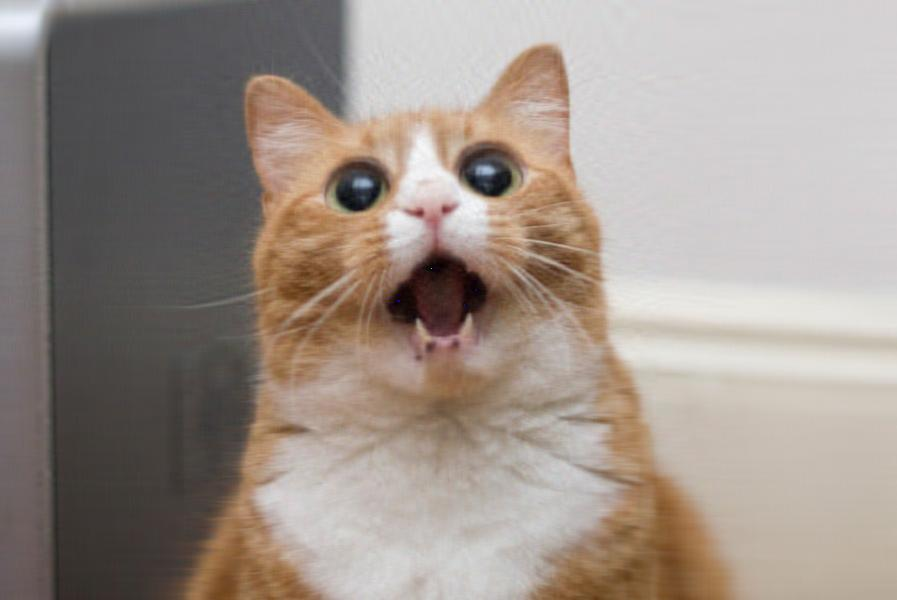

61:
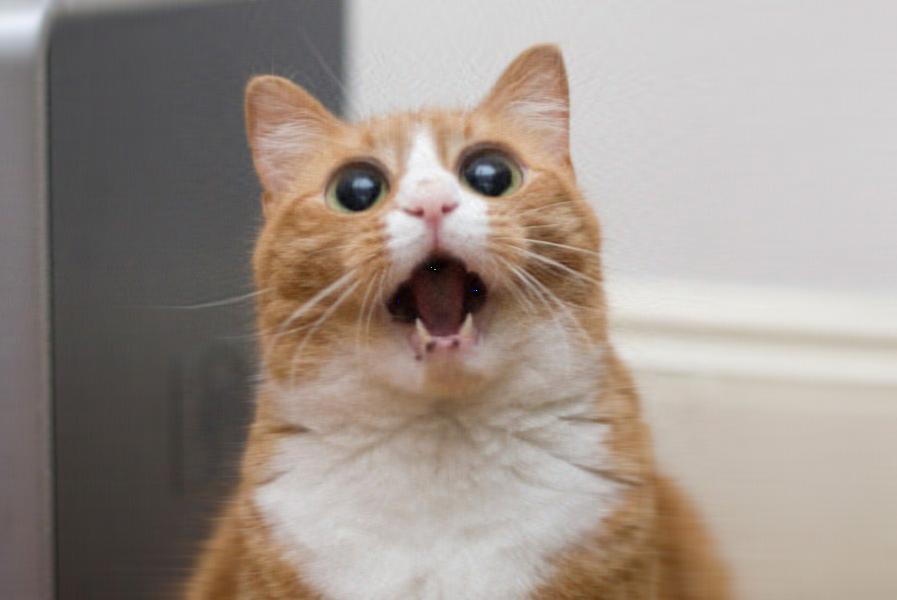


## Part 6

### actual jpg size:

In [8]:
list_size = []
for i in range(1, min(array_image.shape[0], untill_eye), step):
    list_size.append(os.path.getsize(str(i)+ '.jpg'))

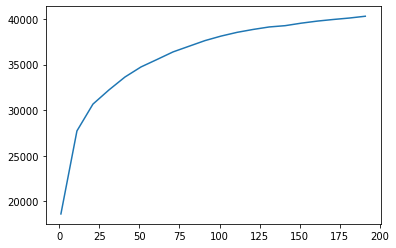

In [9]:
plt.plot(list(range(1, min(array_image.shape[0], untill_eye), step)), list_size)

### dim * (1+m+n) *3 :

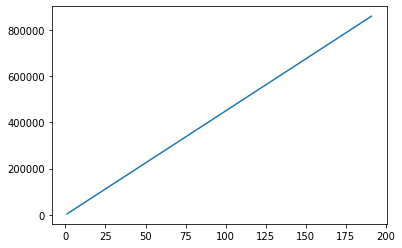

In [10]:
list_size2 = []
for i in range(1, min(array_image.shape[0], untill_eye), step):
    list_size2.append(i * (1+array_image.shape[0]+array_image.shape[1]) * 3)
    
plt.plot(list(range(1, min(array_image.shape[0], untill_eye), step)), list_size2)

## Part 7

In [11]:
select_param = []
for im_rgb in [im_r, im_g, im_b]:
    U, Z, V = np.linalg.svd(im_rgb)
    total_energy = np.sum(np.diag(Z) ** 2)
    for i in range(1, array_image.shape[0]):
        new_Z = np.diag(Z)[0:i, 0:i]
        energy_i = np.sum(new_Z ** 2)
        if total_energy - energy_i < 0.001 * total_energy :
            select_param.append(i)
            break
            
print(f'best k: {max(select_param)}')

best k: 31


In [12]:
list_error = []
for i in range(0, len(list_image)):
    image_i = np.array(list_image[i])
    list_error.append(np.sum((image_i[:,:,0:3] - array_image[:,:,0:3])**2) ** 0.5)

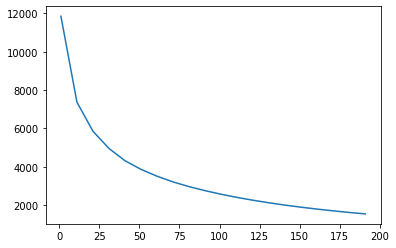

In [13]:
plt.plot(list(range(1, min(array_image.shape[0], untill_eye), step)), list_error)